<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/Ejercicio_sobre_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones Ejercicio

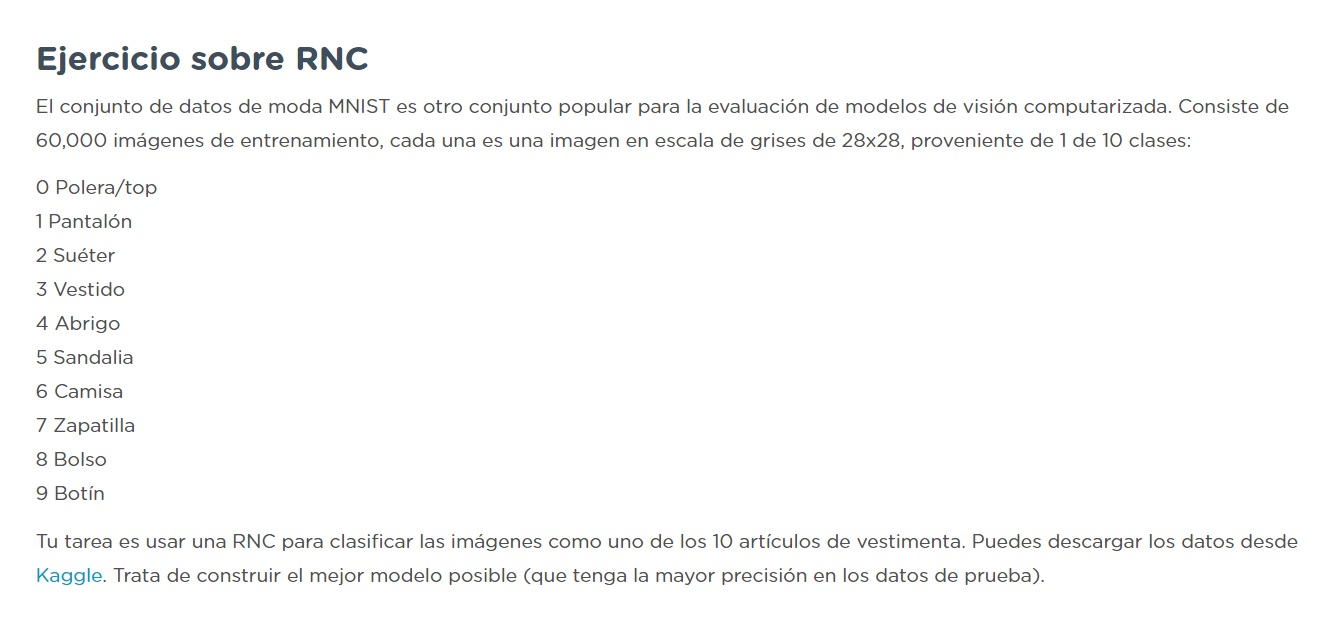

# Montaje Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerias 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Montaje Datasets

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Machine Learning Avanzado/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Machine Learning Avanzado/fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


# Separacion de entrenamiento


In [4]:
X_train = train.drop(columns = 'label')/255
X_test = test.drop(columns = 'label')/255
y_train = train['label']
y_test = test['label']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

# Chequeo de imagenes

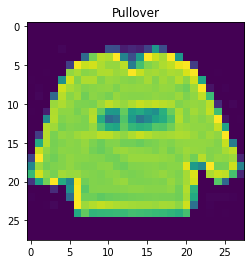

In [7]:
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

plt.imshow(np.array(X_train.loc[0, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[0]]));

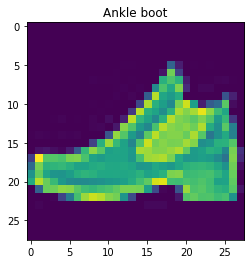

In [8]:
plt.imshow(np.array(X_train.loc[1, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[1]]));

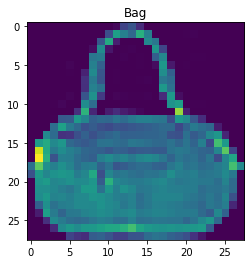

In [9]:
plt.imshow(np.array(X_train.loc[20, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[20]]));

# Reshape de la data

In [10]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], 28, 28, 1)

# Conversion categorica


In [11]:
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

# Definicion de estructura

In [12]:
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

# Modelo secuencial


In [13]:
model = Sequential()

# Capa convolusional

In [14]:
model.add(Conv2D(filters = 32, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 activation = 'relu',
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
Dropout(0.2)
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?

# Compilacion

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

# entrenamiento

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    batch_size = 4096,
                    epochs=100)

Epoch 1/100
12/12 [==============================] - 17s 1s/step - loss: 1.7193 - acc: 0.5297 - val_loss: 1.1350 - val_acc: 0.6661
Epoch 2/100
12/12 [==============================] - 16s 1s/step - loss: 0.9343 - acc: 0.7100 - val_loss: 0.7751 - val_acc: 0.7378
Epoch 3/100
12/12 [==============================] - 15s 1s/step - loss: 0.7158 - acc: 0.7594 - val_loss: 0.6570 - val_acc: 0.7762
Epoch 4/100
12/12 [==============================] - 15s 1s/step - loss: 0.6298 - acc: 0.7839 - val_loss: 0.5969 - val_acc: 0.7918
Epoch 5/100
12/12 [==============================] - 15s 1s/step - loss: 0.5785 - acc: 0.8011 - val_loss: 0.5587 - val_acc: 0.8069
Epoch 6/100
12/12 [==============================] - 15s 1s/step - loss: 0.5451 - acc: 0.8133 - val_loss: 0.5278 - val_acc: 0.8175
Epoch 7/100
12/12 [==============================] - 15s 1s/step - loss: 0.5180 - acc: 0.8230 - val_loss: 0.5042 - val_acc: 0.8242
Epoch 8/100
12/12 [==============================] - 17s 1s/step - loss: 0.4959 - a